In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np

In [2]:
adata = sc.read('../../../../human_cd34_bone_marrow.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 7837 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [5]:
scv.pp.pca(adata)
scv.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
scv.tl.recover_dynamics(adata, n_jobs=4)
scv.tl.velocity(adata, mode='dynamical', vkey='dynvelo', n_jobs=4)

recovering dynamics (using 4/16 cores)


  0%|          | 0/558 [00:00<?, ?gene/s]

    finished (0:01:17) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'dynvelo', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity(adata, mode='stochastic', vkey='stocvelo', n_jobs=12)

computing velocities
    finished (0:00:00) --> added 
    'stocvelo', velocity vectors for each individual cell (adata.layers)


In [8]:
scv.tl.velocity_graph(adata, vkey='dynvelo', n_jobs=12)
scv.tl.velocity_graph(adata, vkey='stocvelo', n_jobs=12)

computing velocity graph (using 12/16 cores)


  0%|          | 0/5780 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'dynvelo_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 12/16 cores)


  0%|          | 0/5780 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'stocvelo_graph', sparse matrix with cosine correlations (adata.uns)


In [9]:
import latentvelo as ltv

cluster_edges = [
    ('HSC_1', 'CLP'),
    ('HSC_1', 'Mega'),
    ('HSC_1', 'Ery_1'), 
    ('Ery_1', 'Ery_2'),
    ('HSC_1', 'HSC_2'),
    ('HSC_2','Precursors'),
    ('HSC_2', 'Mono_2'),
    ('HSC_2', 'Mono_1'),
    ('Precursors','DCs')]

Global seed set to 0


In [10]:
scv.tl.velocity_embedding(adata, vkey='dynvelo', basis='pca')
dyn_pca = ltv.ev.cross_boundary_correctness(adata,
                                  'clusters', 'dynvelo_pca', cluster_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

scv.tl.velocity_embedding(adata, vkey='stocvelo', basis='pca')
stoc_pca = ltv.ev.cross_boundary_correctness(adata,
                                  'clusters', 'stocvelo_pca', cluster_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:01) --> added
    'dynvelo_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01) --> added
    'stocvelo_pca', embedded velocity vectors (adata.obsm)


In [11]:
adata.obsm['X_pca_10'] = adata.obsm['X_pca'][:,:10]

scv.tl.velocity_embedding(adata, vkey='dynvelo', basis='pca_10')
dyn_pca_10 = ltv.ev.cross_boundary_correctness(adata,
                                  'clusters', 'dynvelo_pca_10', cluster_edges, x_emb='X_pca_10', 
                                   majority_vote=True, return_raw=True)

scv.tl.velocity_embedding(adata, vkey='stocvelo', basis='pca_10')
stoc_pca_10 = ltv.ev.cross_boundary_correctness(adata,
                                  'clusters', 'stocvelo_pca_10', cluster_edges, x_emb='X_pca_10', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'dynvelo_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'stocvelo_pca_10', embedded velocity vectors (adata.obsm)


In [12]:
dyn_pca_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'clusters', 'dynvelo_pca', return_raw=True, layer=False)
dyn_pca_10_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'clusters', 'dynvelo_pca_10', return_raw=True, layer=False)


stoc_pca_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'clusters', 'stocvelo_pca', return_raw=True, layer=False)
stoc_pca_10_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'clusters', 'stocvelo_pca_10', return_raw=True, layer=False)

In [13]:
np.save("fits/bonemarrow_dynvelo_pca_.npy", dyn_pca)
np.save("fits/bonemarrow_dynvelo_pca_10_.npy", dyn_pca_10)

np.save("fits/bonemarrow_stocvelo_pca_.npy", stoc_pca)
np.save("fits/bonemarrow_stocvelo_pca_10_.npy", stoc_pca_10)

np.save("fits/bonemarrow_dynvelo_iccoh_pca_.npy", dyn_pca_iccoh)
np.save("fits/bonemarrow_dynvelo_iccoh_pca_10_.npy", dyn_pca_10_iccoh)

np.save("fits/bonemarrow_stoc_iccoh_pca_.npy", stoc_pca_iccoh)
np.save("fits/bonemarrow_stoc_iccoh_pca_10_.npy", stoc_pca_10_iccoh)

computing velocity embedding
    finished (0:00:00) --> added
    'dynvelo_tsne', embedded velocity vectors (adata.obsm)


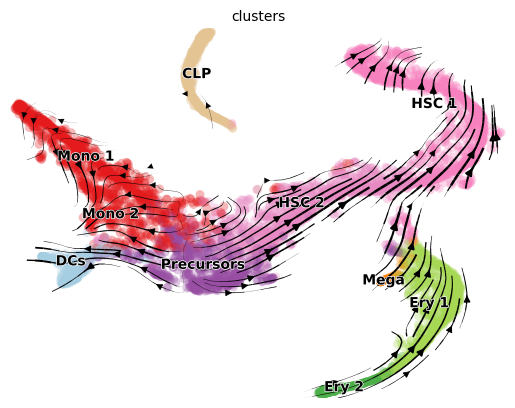

computing velocity embedding
    finished (0:00:00) --> added
    'stocvelo_tsne', embedded velocity vectors (adata.obsm)


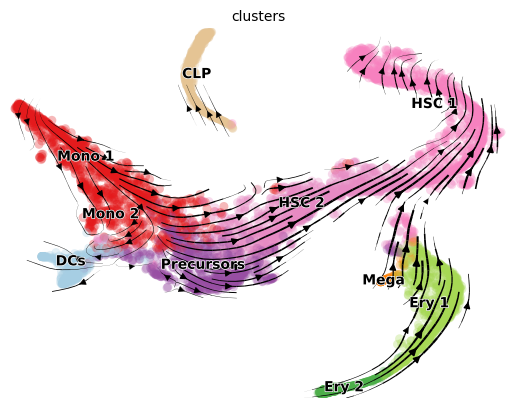

In [14]:
scv.pl.velocity_embedding_stream(adata, vkey='dynvelo', color='clusters')
scv.pl.velocity_embedding_stream(adata, vkey='stocvelo', color='clusters')

computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


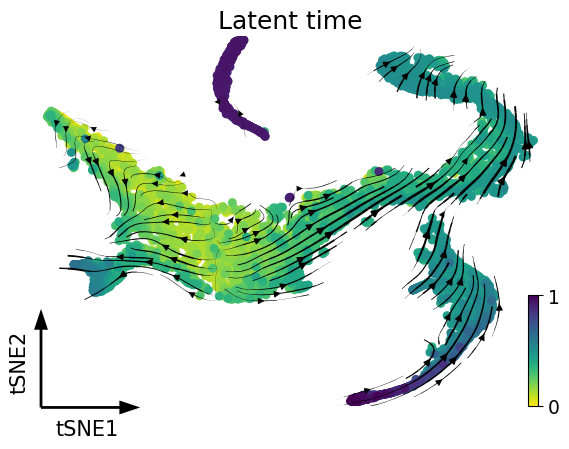

In [19]:
scv.tl.latent_time(adata)
scv.pl.velocity_embedding_stream(adata,vkey='dynvelo', basis='tsne', color=['latent_time'], 
                                 title='Latent time', alpha=1, 
                                 legend_fontsize=18, legend_fontoutline=3, fontsize=18, frameon='artist')

In [18]:
adata.layers['velo_s'] = adata.layers['dynvelo']
adata.layers['velo_u'] = adata.layers['dynvelo_u']

In [19]:
import numpy as np

In [20]:
np.array(adata[:,adata.var.index=='KLF1'].layers['spliced'].todense())

array([[1.024935  ],
       [0.        ],
       [0.        ],
       ...,
       [0.75161904],
       [1.682012  ],
       [0.        ]], dtype=float32)

In [21]:
s_gene = np.array(adata[:,adata.var.index=='KLF1'].layers['Ms'])[:,0] #[:,None]
u_gene = np.array(adata[:,adata.var.index=='KLF1'].layers['Mu'])[:,0] #[:,None]

adata.obsm['X_KLF1'] = np.concatenate((s_gene[:,None], u_gene[:,None]), axis=-1)

vs_gene = np.array(adata[:,adata.var.index=='KLF1'].layers['velo_s'])[:,0]
vu_gene = np.array(adata[:,adata.var.index=='KLF1'].layers['velo_u'])[:,0]


x = np.linspace(s_gene.min()*1.1, s_gene.max()*0.9, 250)
y = np.linspace(u_gene.min()*1.1, u_gene.max()*0.9, 250)

from scipy.interpolate import griddata

S, U = np.meshgrid(x, y)# s_gene, u_gene)

VS = griddata((s_gene, u_gene), vs_gene, (S, U), method='linear')
VU = griddata((s_gene, u_gene), vu_gene, (S, U), method='linear')

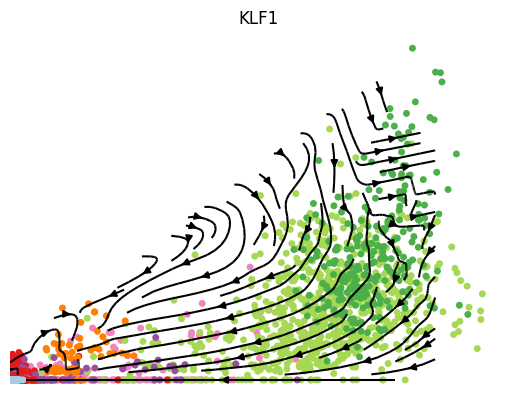

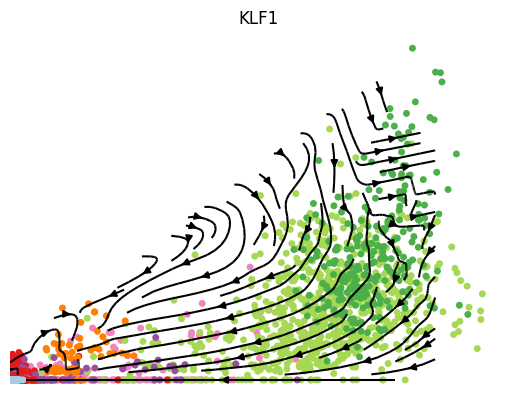

In [23]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
plt.streamplot(S, U, VS, VU, color='k', linewidth=1.5)
sc.pl.scatter(adata, basis='KLF1', color='clusters', ax=ax, title = 'KLF1',
              frameon=False, legend_loc='none', show=False, size=100)
plt.show()
#plt.savefig('figures/scvelo_KLF1.pdf')
#mv.scatter_plot(adata, ['Smim1'], color_by='latent_time', by='us', velocity_arrows=True, show_switches=False,
#               show_anchors=False,figsize=(25,10), downsample=5,axis=ax)